In [330]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from sqlalchemy import desc

In [331]:
import numpy as np
import pandas as pd

In [332]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [333]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [334]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [335]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [336]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [337]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [338]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [339]:
# Display the row's columns and data in dictionary format - Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a3a8ebffa0>,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08}

In [340]:
#State columns to display from Measurements Table
sel_measurements = [Measurement.tobs, Measurement.date, Measurement.id, Measurement.prcp, Measurement.station]
sel_measurements

In [341]:
# Display the row's columns and data in dictionary format - Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a3a680a2b0>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [342]:
#State Columns to display from Stations Table
sel_stations = [Station.id, Station.elevation, Station.latitude, Station.longitude, Station.name,Station.station]
sel_stations

# Exploratory Climate Analysis

In [343]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

last_datapoint_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_datapoint_date = list(np.ravel(last_datapoint_date))

last_datapoint_date = last_datapoint_date[0]

last_datapoint_date


'2017-08-23'

In [344]:
# Convert string date into date time format
last_datapoint_date_parsed = dt.datetime.strptime(last_datapoint_date, '%Y-%m-%d')

last_datapoint_date_parsed


datetime.datetime(2017, 8, 23, 0, 0)

In [345]:
#Calculate year ago
one_year_ago_date = last_datapoint_date_parsed - dt.timedelta(days=365)

one_year_ago_date

datetime.datetime(2016, 8, 23, 0, 0)

In [346]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(*sel_measurements).filter(Measurement.date >= one_year_ago_date).filter(Measurement.date <= last_datapoint_date_parsed).all()
prcp_scores

0.0, '2017-04-18', 5329, 0.08, 'USC00513117'),
 (70.0, '2017-04-19', 5330, 0.02, 'USC00513117'),
 (75.0, '2017-04-20', 5331, 0.33, 'USC00513117'),
 (70.0, '2017-04-21', 5332, 1.16, 'USC00513117'),
 (74.0, '2017-04-22', 5333, 1.01, 'USC00513117'),
 (75.0, '2017-04-23', 5334, 0.02, 'USC00513117'),
 (76.0, '2017-04-24', 5335, 0.0, 'USC00513117'),
 (75.0, '2017-04-25', 5336, 0.0, 'USC00513117'),
 (78.0, '2017-04-26', 5337, 0.0, 'USC00513117'),
 (73.0, '2017-04-27', 5338, 0.1, 'USC00513117'),
 (70.0, '2017-04-28', 5339, 2.6, 'USC00513117'),
 (66.0, '2017-04-29', 5340, 0.35, 'USC00513117'),
 (61.0, '2017-04-30', 5341, 1.21, 'USC00513117'),
 (68.0, '2017-05-01', 5342, 0.07, 'USC00513117'),
 (73.0, '2017-05-02', 5343, 0.03, 'USC00513117'),
 (74.0, '2017-05-03', 5344, 0.01, 'USC00513117'),
 (77.0, '2017-05-04', 5345, 0.0, 'USC00513117'),
 (78.0, '2017-05-05', 5346, 0.0, 'USC00513117'),
 (75.0, '2017-05-06', 5347, 0.0, 'USC00513117'),
 (75.0, '2017-05-07', 5348, 0.07, 'USC00513117'),
 (71.0, '20

In [347]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_scores_df = pd.DataFrame(prcp_scores)
prcp_scores_df

,tobs,date,id,prcp,station
0,79.0,2016-08-24,2365,0.08,USC00519397
1,80.0,2016-08-25,2366,0.08,USC00519397
2,79.0,2016-08-26,2367,0.00,USC00519397
3,77.0,2016-08-27,2368,0.00,USC00519397
4,78.0,2016-08-28,2369,0.01,USC00519397
...,...,...,...,...,...
2218,71.0,2017-08-19,19546,0.09,USC00516128
2219,78.0,2017-08-20,19547,NaN,USC00516128
2220,76.0,2017-08-21,19548,0.56,USC00516128
2221,76.0,2017-08-22,19549,0.50,USC00516128


In [348]:
# Sort the dataframe by date
prcp_scores_df = prcp_scores_df.sort_values('date')
measurements_df = prcp_scores_df #copy data frame for analysis in question later
prcp_scores_df

,tobs,date,id,prcp,station
0,79.0,2016-08-24,2365,0.08,USC00519397
1006,78.0,2016-08-24,8826,NaN,USC00517948
1524,77.0,2016-08-24,14609,2.15,USC00519281
702,80.0,2016-08-24,7332,2.28,USC00514830
360,76.0,2016-08-24,5092,2.15,USC00513117
...,...,...,...,...,...
1522,82.0,2017-08-22,12186,0.00,USC00519523
1523,82.0,2017-08-23,12187,0.08,USC00519523
359,81.0,2017-08-23,2724,0.00,USC00519397
1005,82.0,2017-08-23,7635,0.00,USC00514830


In [349]:
# Clean data - set prcp null values to '0'
prcp_scores_df['prcp'] = prcp_scores_df['prcp'].fillna(0)
prcp_scores_df = pd.DataFrame({
    'date': prcp_scores_df['date'],
    'prcp' : prcp_scores_df['prcp'] 
})
prcp_scores_df

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,0.00
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [350]:
prcp_scores_df.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-24,0.00
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [351]:
# Create a group based on the values in the 'date' column
date_group = prcp_scores_df.groupby('date')

# Total precipitation by date
total_daily_prcp = date_group['prcp'].sum()

total_daily_prcp_df = pd.DataFrame(total_daily_prcp)
total_daily_prcp_df

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


No handles with labels found to put in legend.


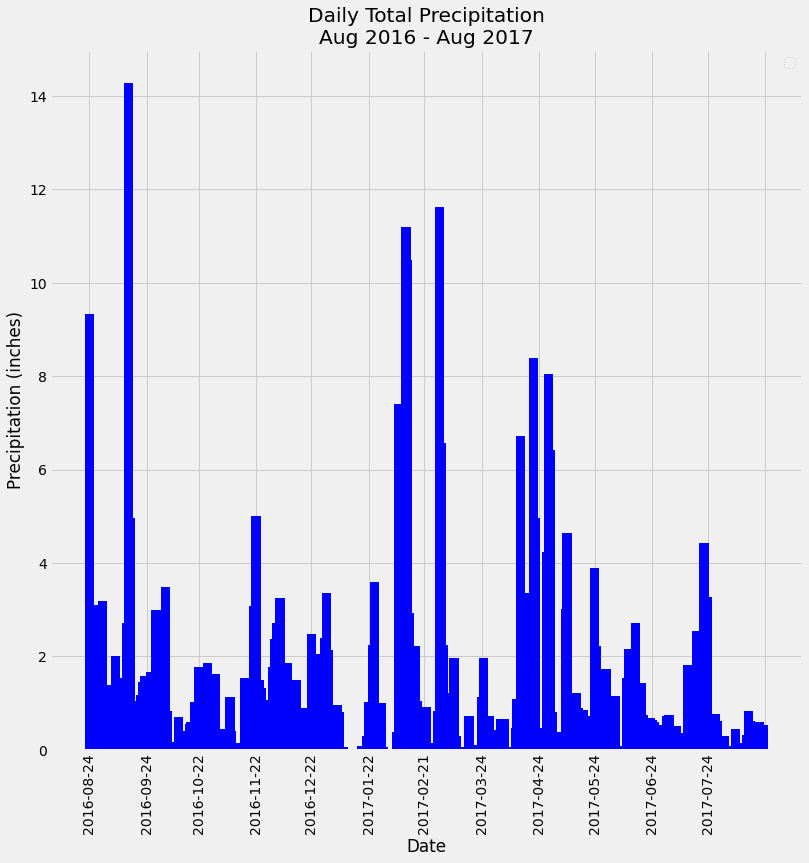

In [352]:
# Use Pandas Plotting with Matplotlib to plot the data
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
x_values = total_daily_prcp_df.index.values
y_values = total_daily_prcp_df['prcp']
ax.bar(x_values, y_values,color='blue', width=5)
plt.xticks(rotation=90)
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nAug 2016 - Aug 2017"
       )

ax.legend(loc='best')

# Ensure a major tick for each month using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()


In [353]:
# Use Pandas to calcualte the summary statistics for the precipitation data
total_daily_prcp_df.describe()

,prcp
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [354]:
# Design a query to show how many stations are available in this dataset?
num_stations_all = session.query(Measurement.station).count()
num_stations_all

19550

In [355]:
#Number of distinct station stations
num_stations_distinct = session.query(Measurement.station).distinct().count()
num_stations_distinct

9

In [356]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_stations

('USC00519281', 2772)

In [357]:
# List the stations and the counts in descending order.
list_of_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
list_of_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [358]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
min_temp = session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station == most_active_stations[0]).all()
min_temp[0]


('USC00519281', 54.0)

In [359]:
# highest temperature recorded, and average temperature of the most active station?
max_temp = session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station == most_active_stations[0]).all()
max_temp[0]

('USC00519281', 85.0)

In [360]:
# Choose the station with the highest number of temperature observations.
highest_tobs_station = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.tobs).order_by(func.count(Measurement.tobs).desc()).first()
highest_tobs_station


('USC00519397', 1752)

In [372]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = session.query(Measurement.date, Measurement.tobs ).filter(Measurement.date >= one_year_ago_date).filter(Measurement.station == highest_tobs_station[0]).group_by(Measurement.date)
tobs_df = pd.DataFrame(tobs)
tobs_df

,date,tobs
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0
...,...,...
355,2017-08-19,79.0
356,2017-08-20,81.0
357,2017-08-21,81.0
358,2017-08-22,82.0


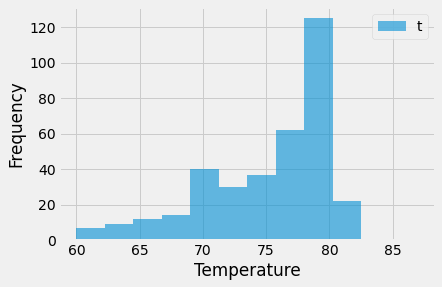

In [362]:
#  Plot the results as a histogram with `bins=12`.

plt.hist(tobs_df.tobs, bins=12, alpha=0.6)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")

# Show Plot
plt.show()

## Bonus Challenge Assignment

In [363]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [364]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [365]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [366]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [367]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

# def daily_normals(date):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
# daily_normals("01-01")

In [368]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [369]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [370]:
# Plot the daily normals as an area plot with `stacked=False`
